In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)


# Read and check


In [25]:
df = pd.read_csv("pokemon_products.csv")
print(df.head())
df50 = df.head(50)

        Title    Price  Availability          Category  \
0   Bulbasaur   £63.00   45 in stock     Pokemon, Seed   
1     Ivysaur   £87.00  142 in stock     Pokemon, Seed   
2    Venusaur  £105.00   30 in stock     Pokemon, Seed   
3  Charmander   £48.00  206 in stock   Lizard, Pokemon   
4  Charmeleon  £165.00  284 in stock    Flame, Pokemon   

                         Tags  \
0   bulbasaur, Overgrow, Seed   
1     ivysaur, Overgrow, Seed   
2    Overgrow, Seed, venusaur   
3   Blaze, charmander, Lizard   
4    Blaze, charmeleon, Flame   

                                         Description  
0  Bulbasaur can be seen napping in bright sunlig...  
1  There is a bud on this Pokémon’s back. To supp...  
2  There is a large flower on Venusaur’s back. Th...  
3  The flame that burns at the tip of its tail is...  
4  Charmeleon mercilessly destroys its foes using...  


# Cleaning

In [26]:
# Check dataset structure and data types
print("DataFrame Info:")
print(df.info())

print("\nSample rows:")
display(df.head(5))

# Count missing values
print("\nMissing values before cleaning:")
print(df.isna().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2556 non-null   object
 1   Price         2556 non-null   object
 2   Availability  2556 non-null   object
 3   Category      2556 non-null   object
 4   Tags          2556 non-null   object
 5   Description   2556 non-null   object
dtypes: object(6)
memory usage: 119.9+ KB
None

Sample rows:


,Title,Price,Availability,Category,Tags,Description
0,Bulbasaur,£63.00,45 in stock,"Pokemon, Seed","bulbasaur, Overgrow, Seed",Bulbasaur can be seen napping in bright sunlig...
1,Ivysaur,£87.00,142 in stock,"Pokemon, Seed","ivysaur, Overgrow, Seed",There is a bud on this Pokémon’s back. To supp...
2,Venusaur,£105.00,30 in stock,"Pokemon, Seed","Overgrow, Seed, venusaur",There is a large flower on Venusaur’s back. Th...
3,Charmander,£48.00,206 in stock,"Lizard, Pokemon","Blaze, charmander, Lizard",The flame that burns at the tip of its tail is...
4,Charmeleon,£165.00,284 in stock,"Flame, Pokemon","Blaze, charmeleon, Flame",Charmeleon mercilessly destroys its foes using...



Missing values before cleaning:
Title           0
Price           0
Availability    0
Category        0
Tags            0
Description     0
dtype: int64


In [27]:
print(f"Shape: {df.shape}")


Shape: (2556, 6)


In [28]:
# Replace 'No category', 'No tags', 'No description' with NaN
df["Category"] = df["Category"].replace("No category", pd.NA)
df["Tags"] = df["Tags"].replace("No tags", pd.NA)
df["Description"] = df["Description"].replace("No description", pd.NA)

# Check missing values again
print("Missing values after cleaning:")
print(df.isna().sum())


Missing values after cleaning:
Title           0
Price           0
Availability    0
Category        0
Tags            0
Description     0
dtype: int64


In [46]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2556 non-null   object 
 1   Price             2556 non-null   object 
 2   Availability      2556 non-null   object 
 3   Category          2556 non-null   object 
 4   Tags              2556 non-null   object 
 5   Description       2556 non-null   object 
 6   Price_num         2556 non-null   float64
 7   Availability_num  2556 non-null   int64  
 8   Main_Category     2556 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 179.8+ KB
None
        Title    Price  Availability         Category  \
0   Bulbasaur   £63.00   45 in stock    Pokemon, Seed   
1     Ivysaur   £87.00  142 in stock    Pokemon, Seed   
2    Venusaur  £105.00   30 in stock    Pokemon, Seed   
3  Charmander   £48.00  206 in stock  Lizard, Pokemon   
4  Charmeleon  £165.00 

In [47]:
#Remove duplicates
df = df.drop_duplicates()

#Handle missing values
df = df.dropna()


In [48]:
#Convert Price column to numeric
df["Price"] = df["Price"].replace('[£,]', '', regex=True).astype(float)

# --- Step 5: (Optional) Convert Availability/Stock to numeric if needed
df["Availability_num"] = df["Availability"].str.extract('(\d+)').astype(float)

# --- Step 6: Create a smaller sample for clean visuals
df50 = df.head(50)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-524965865.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["Availability_num"] = df["Availability"].str.extract('(\d+)').astype(float)


In [32]:
# Strip whitespace and keep only the first category if multiple exist
df["Category"] = df["Category"].str.strip()
df["Main_Category"] = df["Category"].apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)

df["Main_Category"].value_counts().head(10)

,count
Main_Category,
Pokemon,1343
Mouse,24
Dragon,22
Flame,17
Balloon,17
Mushroom,15
Cocoon,14
Fairy,14
Drill,13


# New Section

In [38]:
import matplotlib.pyplot as plt

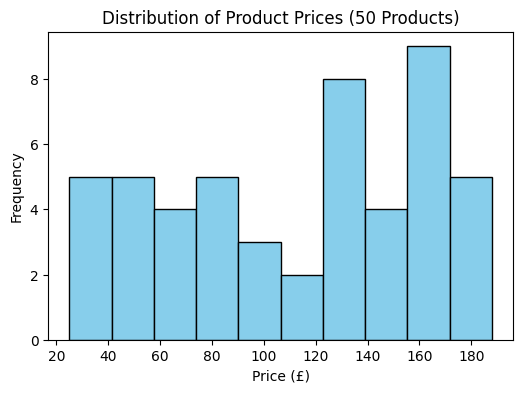

In [50]:
plt.figure(figsize=(6,4))
plt.hist(df50["Price"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Product Prices (50 Products)")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

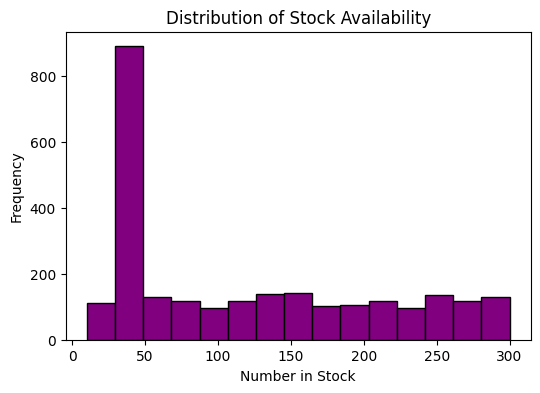

In [31]:
df["Availability_num"].plot(kind="hist", bins=15, figsize=(6,4), color="purple", edgecolor="black")
plt.title("Distribution of Stock Availability")
plt.xlabel("Number in Stock")
plt.ylabel("Frequency")
plt.show()

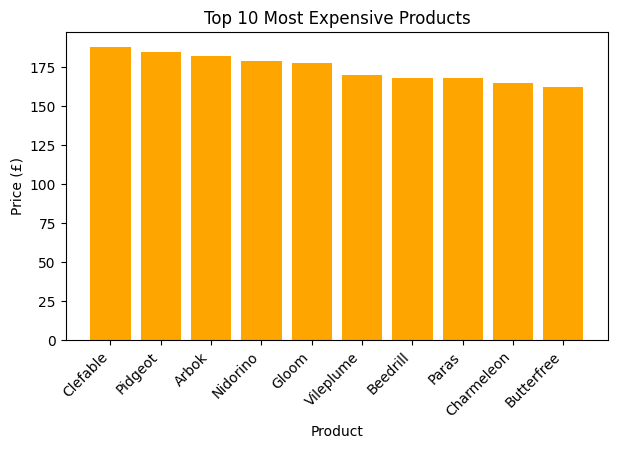

In [51]:
expensive = df50.nlargest(10, "Price")
plt.figure(figsize=(7,4))
plt.bar(expensive["Title"], expensive["Price"], color="orange")
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Product")
plt.ylabel("Price (£)")
plt.xticks(rotation=45, ha="right")
plt.show()

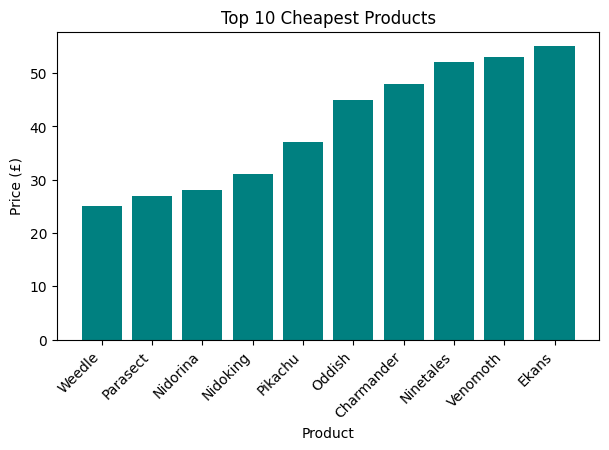

In [52]:
cheapest = df50.nsmallest(10, "Price")
plt.figure(figsize=(7,4))
plt.bar(cheapest["Title"], cheapest["Price"], color="teal")
plt.title("Top 10 Cheapest Products")
plt.xlabel("Product")
plt.ylabel("Price (£)")
plt.xticks(rotation=45, ha="right")
plt.show()

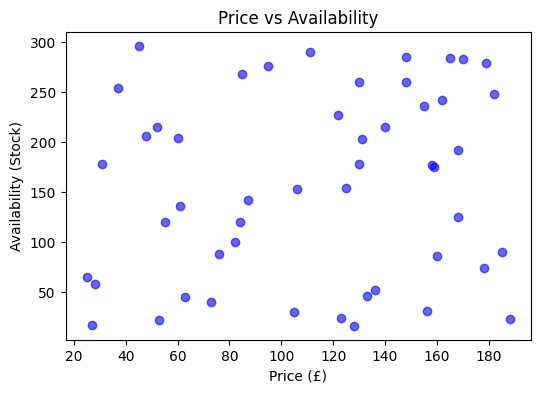

In [53]:
plt.figure(figsize=(6,4))
plt.scatter(df50["Price"], df50["Availability_num"], color="blue", alpha=0.6)
plt.title("Price vs Availability")
plt.xlabel("Price (£)")
plt.ylabel("Availability (Stock)")
plt.show()

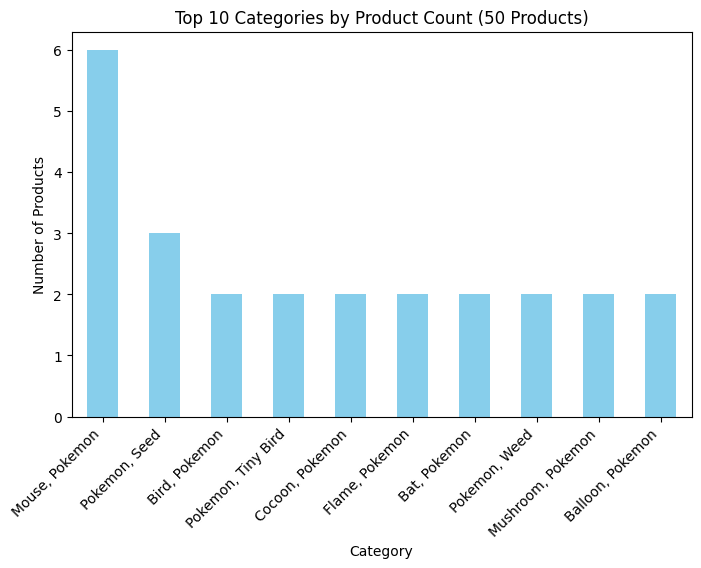

In [61]:
# Top 10 categories by product count (from first 50 products)
top_cats = df50['Category'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_cats.plot(kind="bar", color="skyblue")
plt.title("Top 10 Categories by Product Count (50 Products)")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha="right")
plt.show()


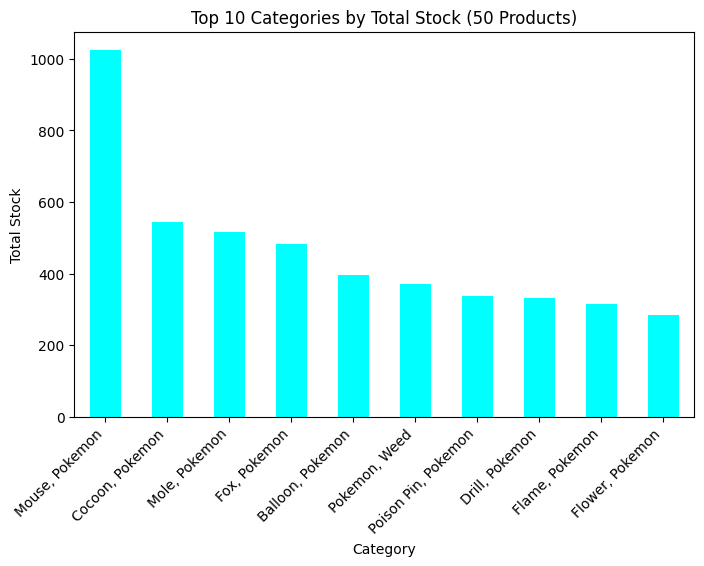

In [63]:
top_stock = df50.groupby("Category")["Availability_num"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_stock.plot(kind="bar", color="cyan")
plt.title("Top 10 Categories by Total Stock (50 Products)")
plt.xlabel("Category")
plt.ylabel("Total Stock")
plt.xticks(rotation=45, ha="right")
plt.show()


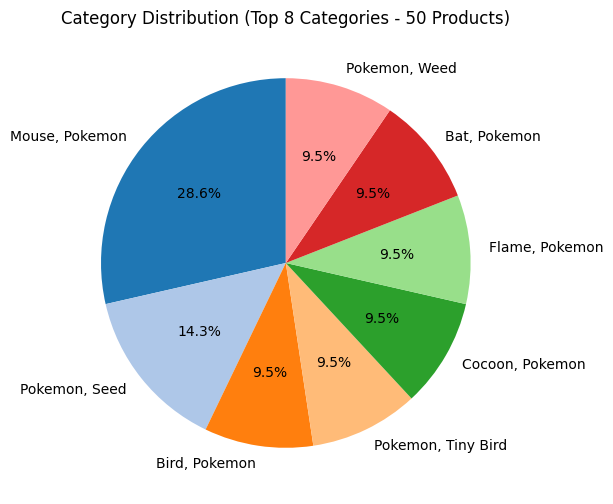

In [62]:
top8_cats = df50['Category'].value_counts().head(8)

plt.figure(figsize=(6,6))
top8_cats.plot(kind="pie", autopct="%1.1f%%", startangle=90,
               colors=plt.cm.tab20.colors)
plt.title("Category Distribution (Top 8 Categories - 50 Products)")
plt.ylabel("")  # Remove label
plt.show()

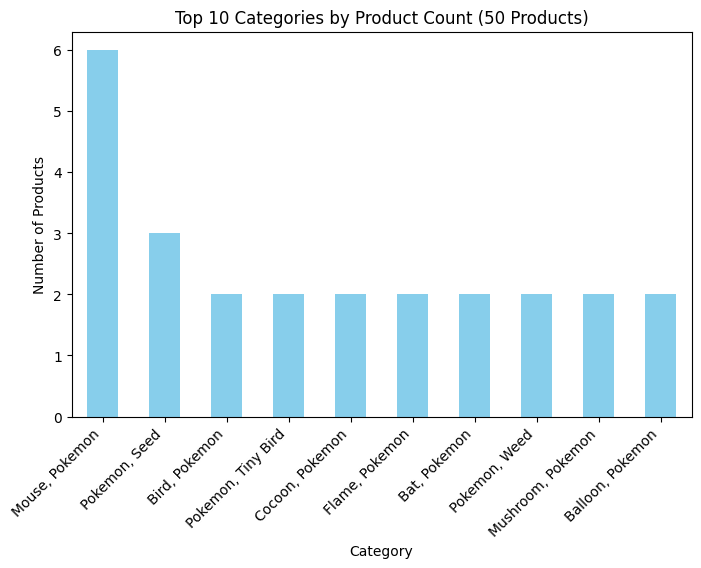

In [60]:
# Top 10 categories by product count (from first 50 products)
top_cats = df50['Category'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_cats.plot(kind="bar", color="skyblue")
plt.title("Top 10 Categories by Product Count (50 Products)")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha="right")
plt.show()